# Random Forest Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [2]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# instantiate the model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0).fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[63,  5],
       [ 4, 28]], dtype=int64)

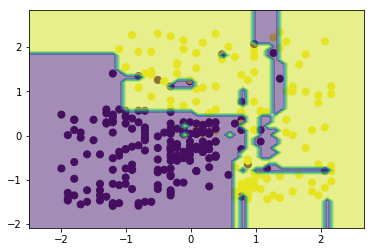

In [7]:
x = X_train_scaled[:, 0]
y = X_train_scaled[:, 1]

x, y = np.meshgrid(np.arange(x.min()-1, x.max()+1, 0.1), 
                  np.arange(y.min()-1, y.max()+1, 0.1))

Z = forest.predict(np.c_[x.ravel(), y.ravel()])
Z = Z.reshape(x.shape)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], s=50, c=y_train)
plt.contourf(x, y, Z, alpha=0.5)
plt.xlim(X_train_scaled[:, 0].min()-0.5, X_train_scaled[:, 0].max()+0.5)
plt.ylim(X_train_scaled[:, 1].min()-0.5, X_train_scaled[:, 1].max()+0.5);

---

# IMPORTANT POINTS

- Concepts:
    - An army of decision trees
    - Make the decision tree less overfit the training set
- Tools:
    - RandomForestClassifier
    - from sklearn.ensemble
    - Parameters:
        - n_estimators: number of trees
        - criterion:
    - Methods:
        - fit
        - predict